# Importing the libraries

In [2]:
! pip install autoviz -q
! pip install tabulate -q

     |████████████████████████████████| 51kB 4.5MB/s 


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the Dataset


In [5]:
#load the dataset
df = pd.read_csv("Advertising.csv")

# We will drop the column "unnamed: 0" as they are serial numbers and will add no value to the model building

df.drop("Unnamed: 0",axis=1, inplace=True)

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### The dataset appears to have a total of 200 rows and 4 columns including 1 target column

In [ ]:
df.shape

(200, 4)

# Preporcessing

### The dataset appears to have all the information intact and as 200 non null out of 200 rows.



### There are a total of 4 columns with float datatype including the target variable "Sales"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Explore the dataset with Autoviz

In [6]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


## We can see from the below scatter plots, sales increaes with the inclusion of TV and Radio features, but newspaper and sales doesn't seem to create much impact as seen in the graph

### There are no categotical variables in the dataset hence AutoViz did not generate bar charts.


### It appears the feature newspaper has outliers copared to others

Shape of your Data Set loaded: (200, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Since Number of Rows in data 200 exceeds maximum, randomly sampling 200 rows for EDA...
4 numeric variables in data exceeds limit, taking top 4 variables
Number of All Scatter Plots = 10


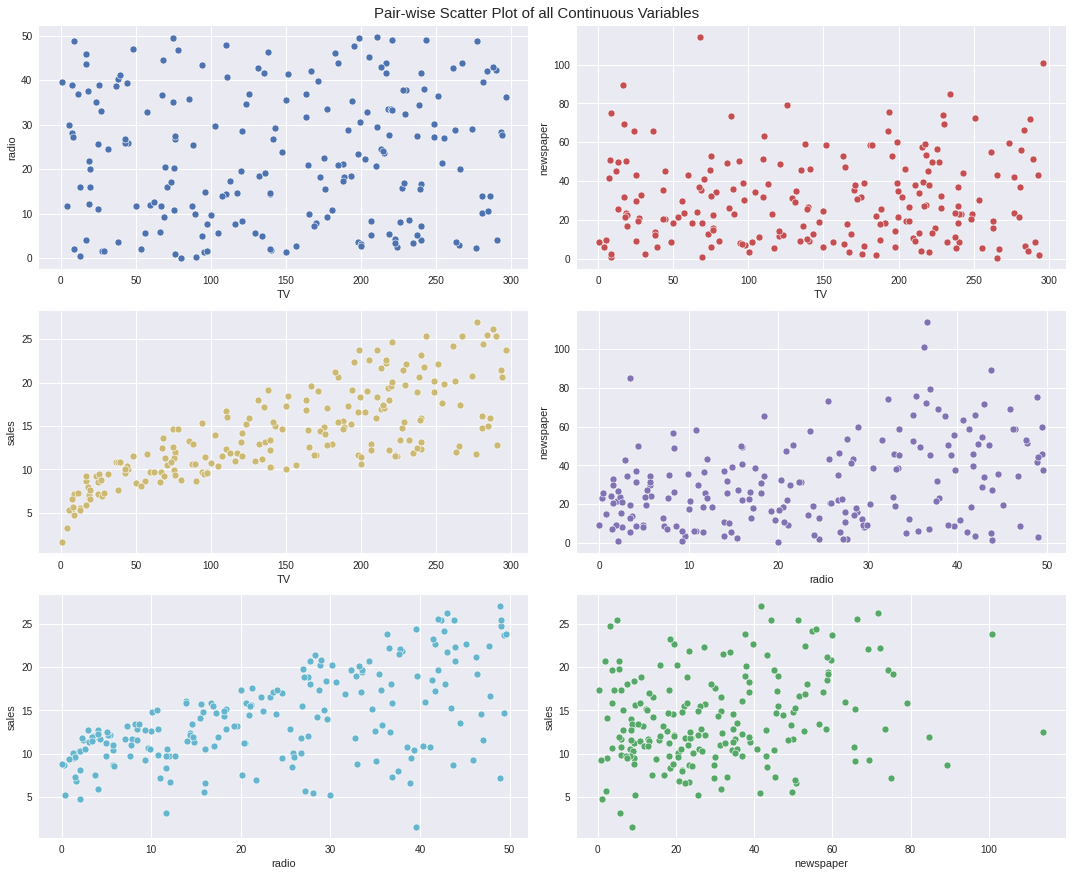

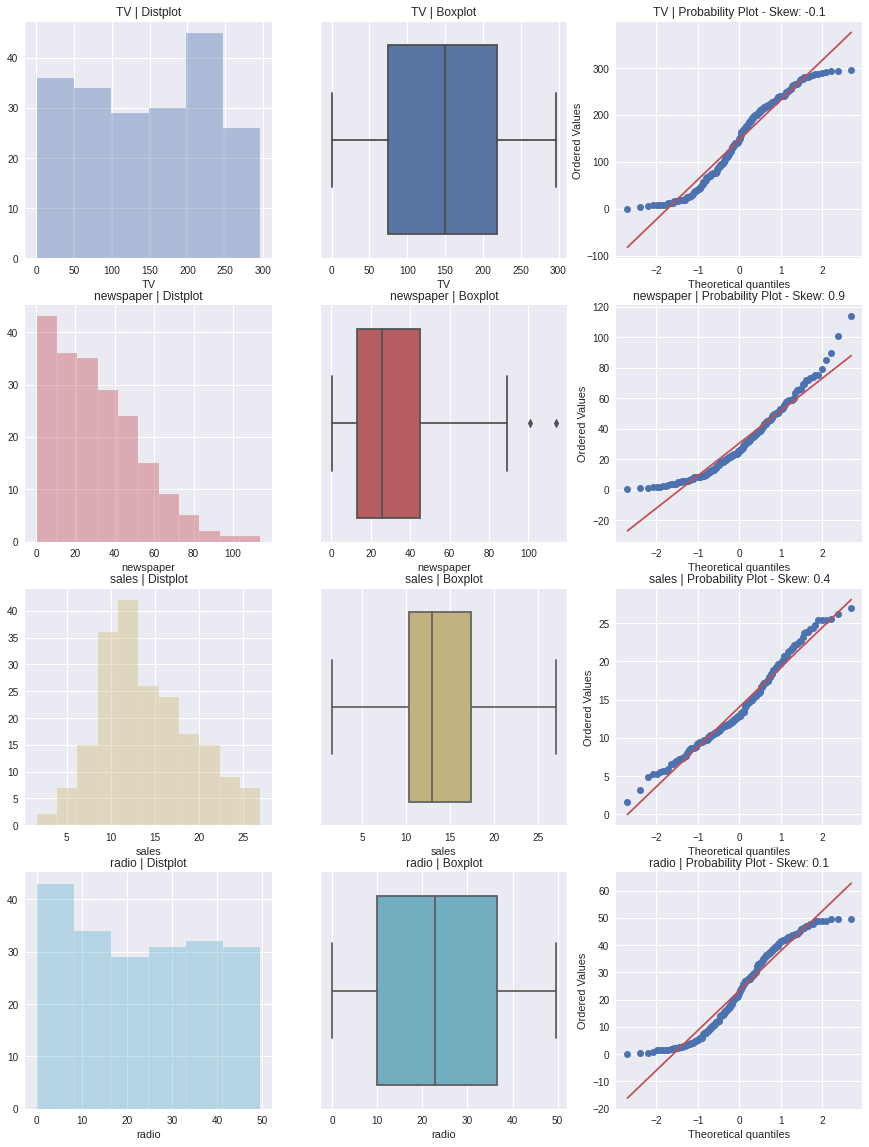

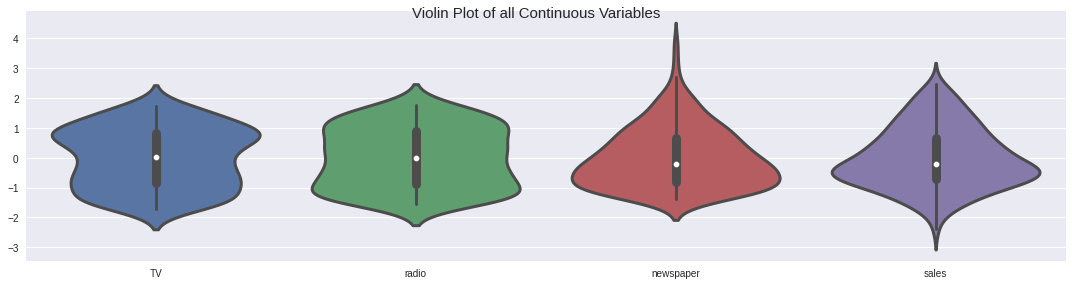

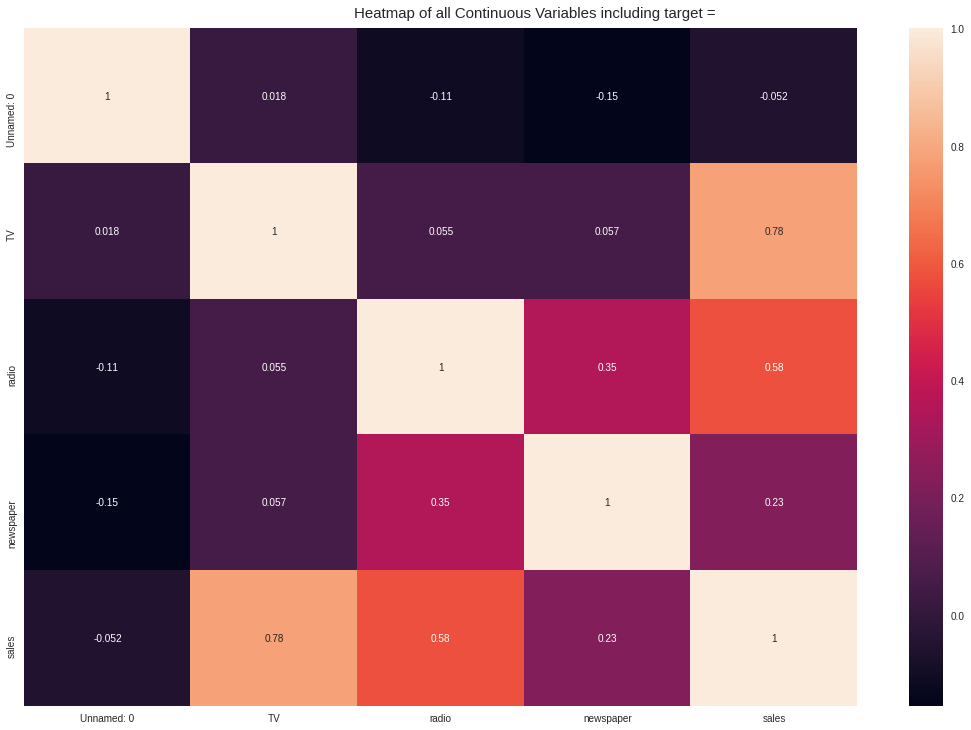

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 6.715

 ###################### VISUALIZATION Completed ########################


In [8]:
dft = AV.AutoViz("Advertising.csv", sep=",", depVar="", dfte=None, header=0, verbose=0,
                lowess=False, chart_format="svg", max_rows_analyzed=200, max_cols_analyzed=4)

# Distribution of all the columns in the dataset


### All the features seem to be a little less normal distributed. So let us try to identify and remove outliers to check if the output can be imporved

### If we ignore the target variable 'sales', we have skewness in 'TV', 'radio' and 'newspaper' to some extent.

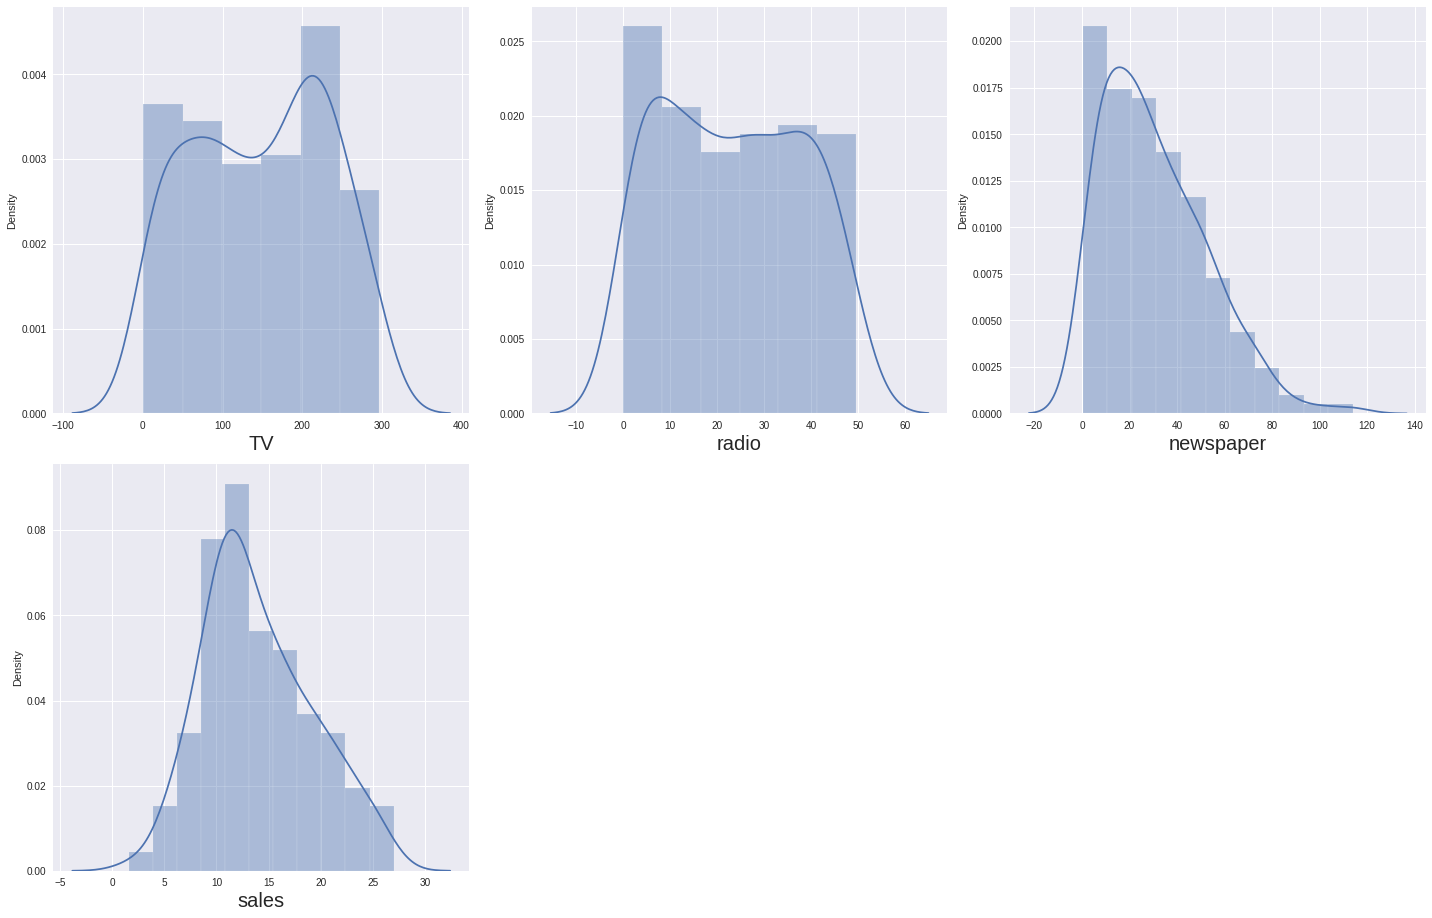

In [ ]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Identifying the column names to pass it for outlier removal

In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Applying Z-score to identify and remove outliers

### It appears the dataset has removed / reduced outliers to some extent

### The stats show reduction of total values in the dataset to minimal extent only

In [ ]:
from scipy.stats import zscore

z_score = zscore(df[['TV', 'radio', 'newspaper']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case its approximately 1% and not much of data is lost

In [ ]:
# Percentage data loss:

loss_percent = (200-198)/200*100
print(loss_percent)

1.0


# Distribution of all the columns in the dataset (post z-score)

#### Ignoring the categorical values, the dataset is not perfectly normally distributed but its appears to be normally distributed than before.

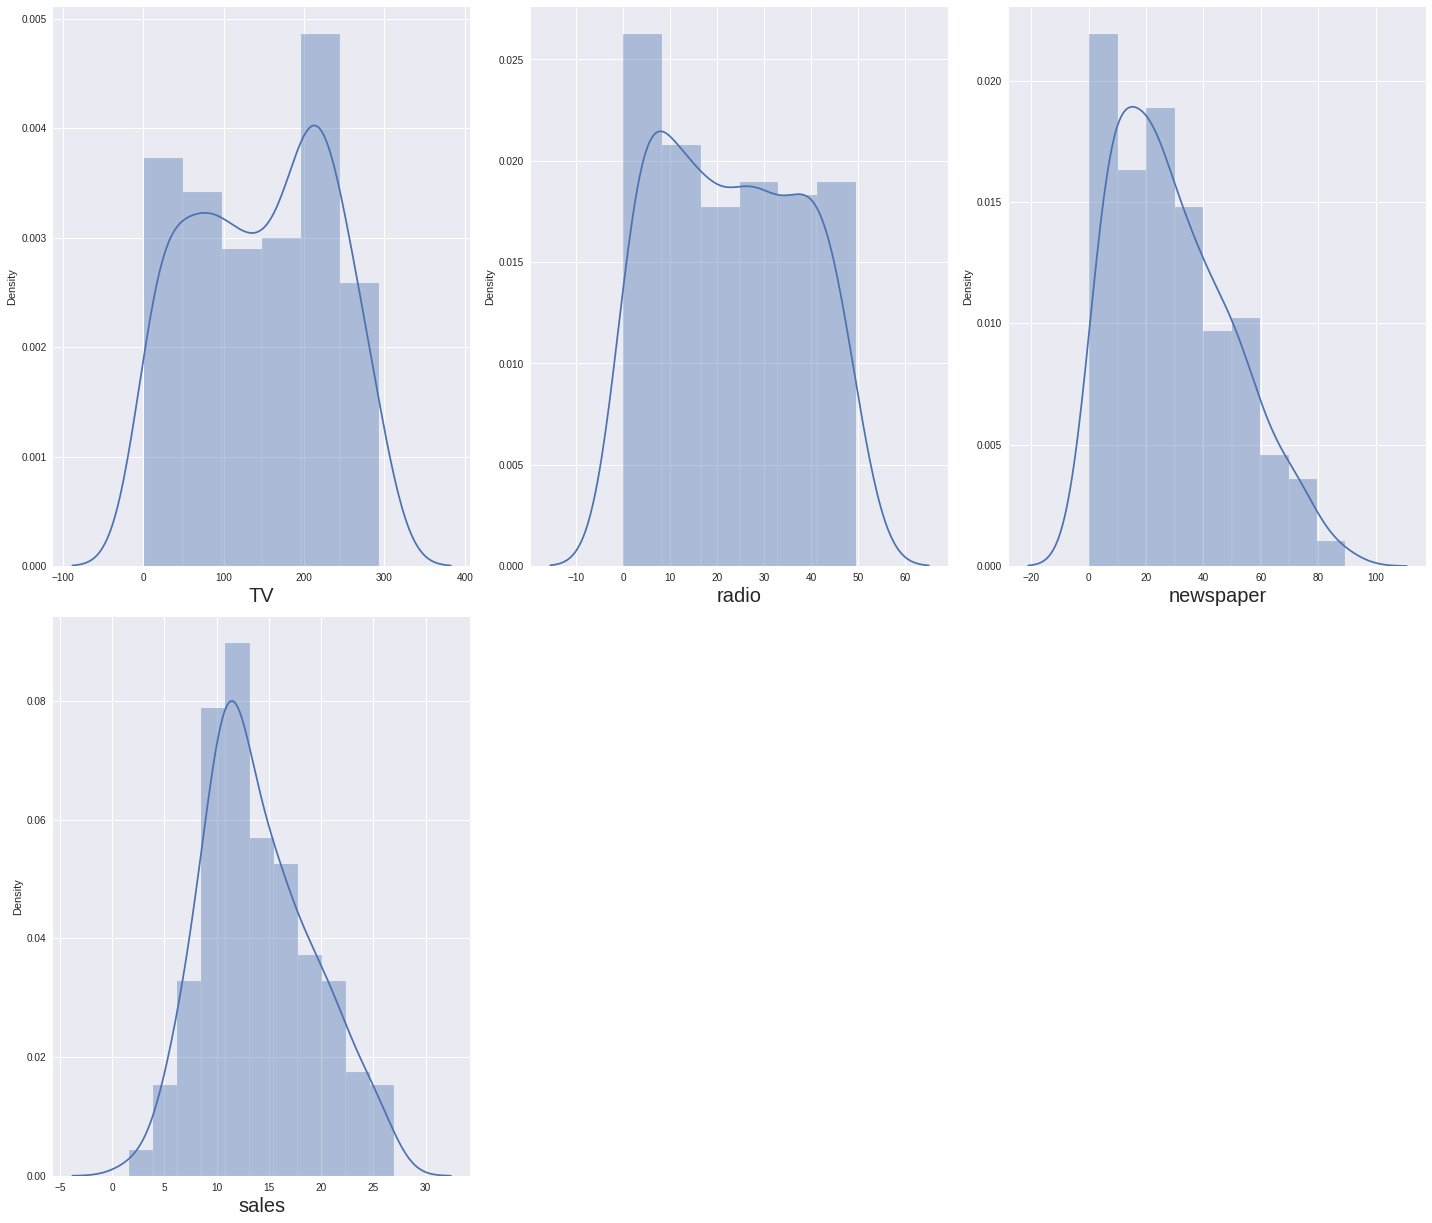

In [ ]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "Sales"

#### The values are high for all features and its show the high correlation with each other

In [ ]:
corr_matrix = df.corr()
corr_matrix["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.779121
radio        0.576748
newspaper    0.219555
Name: sales, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification

### If we observe the heatmap, it appears TV and sales have a strong correlation compared to other features

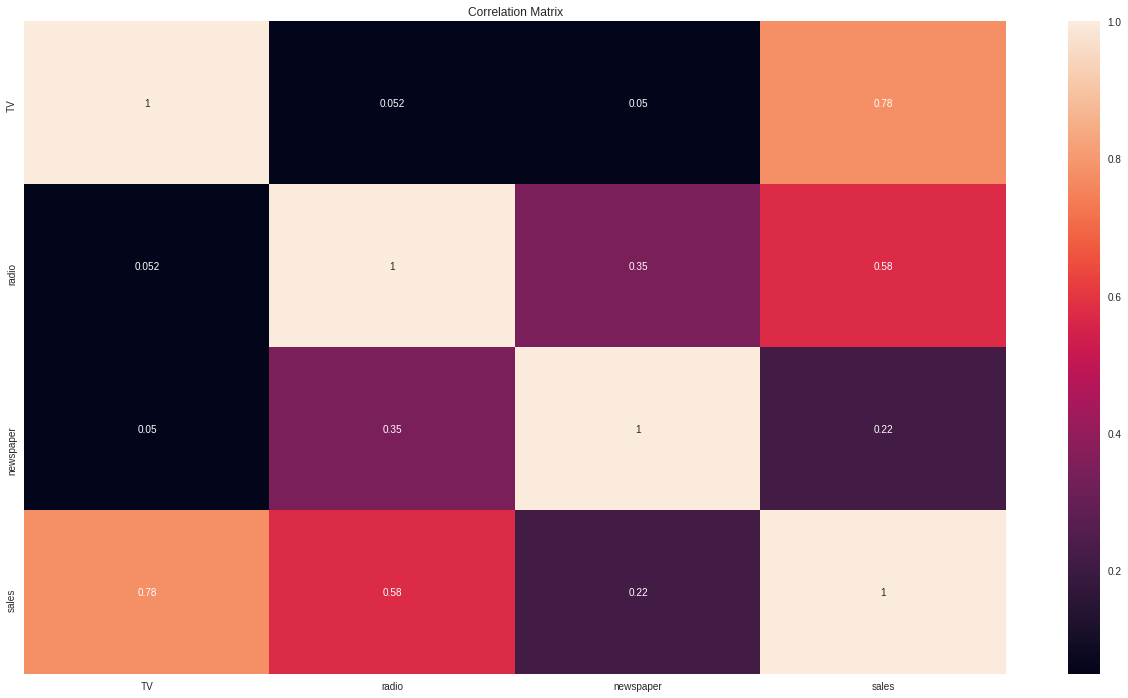

In [ ]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [ ]:
x = df.drop(columns = ["sales"], axis=1)
y = df["sales"]

### Check for skewness of data

#### The data is not skewed and it falls within the accepted range

#### Columns "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight" and "Shell weight" have skewness amongst each other.

#### Let's now proceed to further remove/ reduce the skewness for better results

In [ ]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Finding variance inflation factor in each scaled column
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears none of the columns have multicolinearity

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


# split the dataset into train and test data set

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


# Create multi output regression models

### I have considered 7 ML models in thsi scenario



### 1) DecisionTreeRegressor

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.7433333333333331
Mean Squared Error (MSE):  0.8996666666666666
Root Mean Squared Error (RMSE):  0.9485075996884087


### 2) RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9965550673365164
Mean Absolute Error (MAE):  0.5860666666666645
Mean Squared Error (MSE):  0.530736333333332
Root Mean Squared Error (RMSE):  0.7285165292107874


### 3) XGBRegressor

In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train)

y_pred = xgb_reg.predict(x_test)

print("Adjusted R2 squared : ",xgb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

[09:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Adjusted R2 squared :  0.9981549419481316
Mean Absolute Error (MAE):  0.5630950085322063
Mean Squared Error (MSE):  0.49042636628466046
Root Mean Squared Error (RMSE):  0.7003044811256461


### 4) AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train,y_train)

y_pred = adb_reg.predict(x_test)

print("Adjusted R2 squared : ",adb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9781289602945169
Mean Absolute Error (MAE):  0.8059562640083102
Mean Squared Error (MSE):  1.097812812348134
Root Mean Squared Error (RMSE):  1.047765628539195


### 5) KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9493254692609587
Mean Absolute Error (MAE):  0.9449999999999996
Mean Squared Error (MSE):  1.6972999999999991
Root Mean Squared Error (RMSE):  1.302804666862995


### 6) HistGradientBoostingRegressor

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist_grad = HistGradientBoostingRegressor()
hist_grad.fit(x_train,y_train)

y_pred = hist_grad.predict(x_test)

print("Adjusted R2 squared : ",hist_grad.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9769361272622936
Mean Absolute Error (MAE):  0.6870754360513566
Mean Squared Error (MSE):  0.773792834596879
Root Mean Squared Error (RMSE):  0.8796549520106614


### 7) ARDRegression


In [ ]:
from sklearn.linear_model import ARDRegression

ard_reg = ARDRegression()
ard_reg.fit(x_train,y_train)

y_pred = ard_reg.predict(x_test)

print("Adjusted R2 squared : ",ard_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.8940886950349809
Mean Absolute Error (MAE):  1.1654862707545397
Mean Squared Error (MSE):  2.6645829145730833
Root Mean Squared Error (RMSE):  1.6323550209966835


# Cross validation to check if its overfitting

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.9507177768358984


In [ ]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.9761174067520202


In [ ]:
scr = cross_val_score(xgb_reg, x, y, cv=5)
print("Cross Validation score of XGBoostRegressor model is:", scr.mean())

[09:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation score of XGBoostRegressor model is: 0.9759879359316489


In [ ]:
scr = cross_val_score(adb_reg, x, y, cv=5)
print("Cross Validation score of AdaBoostRegressor model is:", scr.mean())

Cross Validation score of AdaBoostRegressor model is: 0.9538803715250509


In [ ]:
scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: 0.9085884467177154


In [ ]:
scr = cross_val_score(hist_grad, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingRegressor model is:", scr.mean())

Cross Validation score of HistGradientBoostingRegressor model is: 0.9647126632803158


In [ ]:
scr = cross_val_score(ard_reg, x, y, cv=5)
print("Cross Validation score of ARDRegression model is:", scr.mean())

Cross Validation score of ARDRegression model is: 0.8877749957432466


# Selecting the best ML model for this dataset

#### From the below, it appears ARDRegression is the appropriate algorithm for this scenario


| Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- |---|
| DecisionTreeRegressor | 100 | 0.950717776835898 | 99.0492822231641 |
| RandomForestRegressor | 0.996555067336516 | 0.97611740675202 | 0.020437660584496 |
| XGBoostRegressor | 0.998154941948131 | 0.975987935931648 | 0.022167006016483 |
| AdaBoostRegressor | 0.978128960294516 | 0.95388037152505 | 0.024248588769466 |
| KNeighborsRegressor | 0.949325469260958 | 0.908588446717715 | 0.040737022543243 |
| HistGradientBoostingRegressor | 0.976936127262293 | 0.964712663280315 | 0.0122234639819779 |
| ARDRegression | 0.89408869503498 | 0.887774995743246 | 0.00631369929173398 |




##Hyper Parameter Tuning
###Let us try to tune the proposed model (ARDRegression) to improve the outcome
###The "paramaters" have been selected from the skicit library and I have considered 6 paramaters

In [ ]:
parameters = {"n_iter":[50,100,150],
              "compute_score":[True, False],
              "threshold_lambda":[1000,5000,10000],
              "fit_intercept":[True, False],
              "normalize":[True, False],
              "lambda_1":[0.000001, 0.000003, 0.000005]
             }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset with CV as 5

In [ ]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(ARDRegression(), parameters, cv=5)

In [ ]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ARDRegression(alpha_1=1e-06, alpha_2=1e-06,
                                     compute_score=False, copy_X=True,
                                     fit_intercept=True, lambda_1=1e-06,
                                     lambda_2=1e-06, n_iter=300,
                                     normalize=False, threshold_lambda=10000.0,
                                     tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'compute_score': [True, False],
                         'fit_intercept': [True, False],
                         'lambda_1': [1e-06, 3e-06, 5e-06],
                         'n_iter': [50, 100, 150], 'normalize': [True, False],
                         'threshold_lambda': [1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
GCV.best_params_

{'compute_score': True,
 'fit_intercept': True,
 'lambda_1': 5e-06,
 'n_iter': 50,
 'normalize': False,
 'threshold_lambda': 1000}

### Rebuild the model using the appropriate params we recieved from best_params_

In [ ]:
ard_mod_final = ARDRegression(compute_score =True, fit_intercept =True, lambda_1 =5e-06, n_iter =50, 
                    normalize=False, threshold_lambda= 1000)

ard_mod_final.fit(x_train,y_train)
pred = ard_mod_final.predict(x_test)
pred

array([19.57804296,  7.55429197, 15.42562447, 18.21889095, 16.66767822,
       15.1526238 , 12.33085325, 12.16418305, 12.54571194, 16.42947652,
       24.2115582 , 16.49251059, 18.20154235, 12.58757637, 15.68993639,
       11.1934945 , 20.83254845, 15.69976402,  9.84075372,  6.21970667,
       14.27204381, 18.05309784, 18.6463936 ,  6.30301633, 15.36741703,
       20.44297526, 15.28013848, 14.53619091, 14.88104052, 21.19133026,
       19.26247274, 17.40284006, 17.3640722 , 12.1225367 ,  4.66785427,
       10.61680592, 21.93327404,  9.28772323, 21.64806144, 14.81856371,
       12.80910543,  6.97480969,  7.74419867, 10.69222152, 17.38798228,
       14.94042315, 17.41605018,  8.97859816, 16.99382967, 14.08833026,
        8.91389709,  8.55003426, 19.75777065, 21.3327093 ,  7.21296052,
       23.29947694, 17.13963788, 16.41354291, 14.44707815,  9.87395352])

# Saving the model (using joblib)

In [ ]:
from sklearn.externals import joblib
 
joblib.dump(ard_mod_final,"Advertising_Prediction.pkl")

['Advertising_Prediction.pkl']

# Loading the saved model

In [ ]:
model = joblib.load("Advertising_Prediction.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,19.578043
1,7.554292
2,15.425624
3,18.218891
4,16.667678
5,15.152624
6,12.330853
7,12.164183
8,12.545712
9,16.429477
